In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sn
import random

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

# Packages for modeling
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import svm
#evaluation of model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#all packages 
import nltk 
import string 
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from bs4 import BeautifulSoup
nltk.download('stopwords')
import string #has the list of all punctuations
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Bhumika
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Bhumika
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Bhumika
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
df = pd.read_csv("D:/Mental health chatbot/cb2/datasets/20200325_counsel_chat.csv",encoding="utf-8")

In [6]:
len(df['topic'].unique())

31

In [7]:
df.columns

Index(['Unnamed: 0', 'questionID', 'questionTitle', 'questionText',
       'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText',
       'upvotes', 'views', 'split'],
      dtype='object')

In [14]:
len(df)

2129

In [22]:
for index,rows in df.iterrows():
    print(df['questionText'][index])

I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going thr

I have been married for 11 years. Within the past 2 years we have drifted far apart. We coexist together but there is very little personal interest in each other. I often feel that my husband has "friends" at work that he is more emotional invested in than me. I feel very alone and just uncared for. Is there anything I can do to feel reconnected?
I have been married for 11 years. Within the past 2 years we have drifted far apart. We coexist together but there is very little personal interest in each other. I often feel that my husband has "friends" at work that he is more emotional invested in than me. I feel very alone and just uncared for. Is there anything I can do to feel reconnected?
I have been married for 11 years. Within the past 2 years we have drifted far apart. We coexist together but there is very little personal interest in each other. I often feel that my husband has "friends" at work that he is more emotional invested in than me. I feel very alone and just uncared for. I

My friend is abusing her prescription medicine. Even though she told me she didn't have any more pills, I found she has prescriptions for anxiety medications.
My friend is abusing her prescription medicine. Even though she told me she didn't have any more pills, I found she has prescriptions for anxiety medications.
My friend is abusing her prescription medicine. Even though she told me she didn't have any more pills, I found she has prescriptions for anxiety medications.
She's my stepmom. I'm pretty sure she's illegally buying the drugs and hiding them from my dad.
My brother has been a heroin addict for years, and he’s now in his mid-30s. He has taken from me my mom and my grandparents. He's sick in the head. Now he moved his girlfriend into the house because they both manipulated us. Today, my mom and my brother went toe-to-toe over his girlfriend not helping around the house and always being high. I ended up hitting my brother for getting so close to my mom's face. I feel terrible,

In [15]:
len(df['questionTitle'].unique())

818

AxesSubplot(0.125,0.125;0.775x0.755)


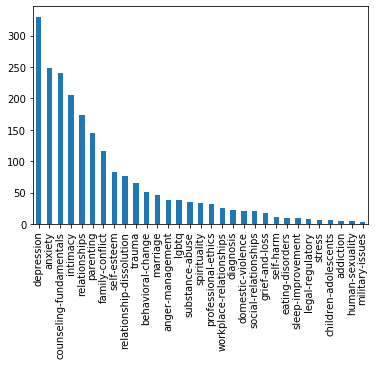

In [74]:
x = df['topic'].value_counts()
print(x.plot.bar())

In [75]:
topics = df['topic'].unique()

In [76]:
#for now predict the topic

In [43]:
stop_w = stopwords.words('english')

In [44]:
def clean(column,df,stopwords=False):
  #remove stop words
  df[column] = df[column].apply(str)
  df[column] = df[column].str.lower().str.split()
  if stopwords:
        df[column]=df[column].apply(lambda x: [item for item in x if item not in stop_w])
  #remove punctuation
  df[column]=df[column].apply(lambda x: [item for item in x if item not in string.punctuation])
  df[column]=df[column].apply(lambda x: " ".join(x))
  
  #lowercase text - already done in models

In [79]:
df.dtypes

Unnamed: 0        int64
questionID        int64
questionTitle    object
questionText     object
questionLink     object
topic            object
therapistInfo    object
therapistURL     object
answerText       object
upvotes           int64
views             int64
split            object
dtype: object

In [193]:
clean('questionTitle',df)

In [194]:
df['questionTitle'][155]

"i've feeling sadness"

In [195]:
clean('questionText',df)

In [196]:
X = df['questionTitle']+df['questionText']
y = df['topic']

In [197]:
y

0                    depression
1                    depression
2                    depression
3                    depression
4                    depression
                 ...           
2124    counseling-fundamentals
2125    counseling-fundamentals
2126    counseling-fundamentals
2127    counseling-fundamentals
2128    counseling-fundamentals
Name: topic, Length: 2129, dtype: object

In [198]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [200]:
le.classes_

array(['addiction', 'anger-management', 'anxiety', 'behavioral-change',
       'children-adolescents', 'counseling-fundamentals', 'depression',
       'diagnosis', 'domestic-violence', 'eating-disorders',
       'family-conflict', 'grief-and-loss', 'human-sexuality', 'intimacy',
       'legal-regulatory', 'lgbtq', 'marriage', 'military-issues',
       'parenting', 'professional-ethics', 'relationship-dissolution',
       'relationships', 'self-esteem', 'self-harm', 'sleep-improvement',
       'social-relationships', 'spirituality', 'stress',
       'substance-abuse', 'trauma', 'workplace-relationships'],
      dtype=object)

In [83]:
#word embeddings
import tensorflow as tf
!pip install tensorflow_hub
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [160]:
joblib.dump(y,'labelencoder.joblib')

['labelencoder.joblib']

In [201]:
joblib.dump(le,'newle.joblib')

['newle.joblib']

In [85]:
X[0]

"change feeling worthless everyone?i'm going things feelings myself. barely sleep nothing think i'm worthless here. i've never tried contemplated suicide. i've always wanted fix issues, never get around it. change feeling worthless everyone?"

In [86]:
X

0       change feeling worthless everyone?i'm going th...
1       change feeling worthless everyone?i'm going th...
2       change feeling worthless everyone?i'm going th...
3       change feeling worthless everyone?i'm going th...
4       change feeling worthless everyone?i'm going th...
                              ...                        
2124    happens counseling session?first meeting clien...
2125    happens counseling session?first meeting clien...
2126    happens counseling session?first meeting clien...
2127    happens counseling session?first meeting clien...
2128    happens counseling session?first meeting clien...
Length: 2129, dtype: object

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [88]:
y_train[0]

18

In [89]:
y_train

array([18,  8, 15, ..., 13,  6,  1])

In [90]:
len(le.classes_)

31

In [225]:
logreg = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
            ('clf', LogisticRegression(penalty='l2')),
            ])
ans = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Test accuracy is :'+ str(accuracy_score(y_test, y_pred)))

C:\Users\Bhumika Bhatia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhumika Bhatia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test accuracy is :0.687793427230047


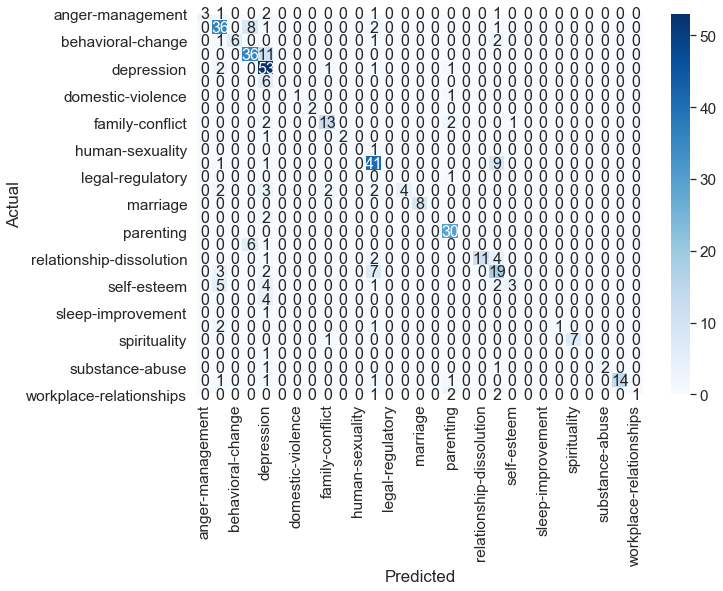

In [257]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(le.inverse_transform(y_test)), index = np.unique(le.inverse_transform(y_test)))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [91]:
NB_WORDS = 5000

NB_EPOCHS = 15  

BATCH_SIZE = 32 

MAX_LEN = 200

In [92]:
X_train

613     kids come back dad's act like afraid get hit, ...
1009    get partner stop verbally abusing me?every tim...
1710    deal gender dysphoria positive way?i'm transge...
1554    fix relationship?boyfriend recovery drug addic...
133     wishing born sign something deeper?i'm suicida...
                              ...                        
960     could car accident add problems posttraumatic ...
905     get coworker?i've worked guy three years now, ...
1096    get divorce?cheated husband five years roughly...
235     husband wants divorce diagnosed severe depress...
1061    manage anger?angry. feel like arguments parent...
Length: 1703, dtype: object

In [93]:
tokenizer = Tokenizer(
    num_words = NB_WORDS,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = MAX_LEN)
y_train = to_categorical(y_train) #one hot encoding for keras

In [147]:
import joblib
joblib.dump(tokenizer,'tokenizer.joblib')

['tokenizer.joblib']

In [94]:
model = Sequential()
model.add(Embedding(NB_WORDS,output_dim=256,input_length = MAX_LEN))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(256, dropout= 0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(31,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 256)          1280000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 31)                3999      
Total params: 1,842,207
Trainable params: 1,842,207
Non-trainable params: 0
____________________________________________

In [95]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [98]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs =NB_EPOCHS,
    callbacks=[callback],
    batch_size = BATCH_SIZE
)

Train on 1532 samples, validate on 171 samples
Epoch 1/15
1532/1532 [==============================] - 43s 28ms/step - loss: 3.0355 - accuracy: 0.1273 - val_loss: 2.7880 - val_accuracy: 0.2398
Epoch 2/15
1532/1532 [==============================] - 45s 29ms/step - loss: 2.5551 - accuracy: 0.2474 - val_loss: 2.2178 - val_accuracy: 0.3216
Epoch 3/15
1532/1532 [==============================] - 41s 27ms/step - loss: 1.9002 - accuracy: 0.4047 - val_loss: 1.7966 - val_accuracy: 0.5029
Epoch 4/15
1532/1532 [==============================] - 41s 27ms/step - loss: 1.3777 - accuracy: 0.5685 - val_loss: 1.4624 - val_accuracy: 0.5205
Epoch 5/15
1532/1532 [==============================] - 41s 27ms/step - loss: 0.9340 - accuracy: 0.7226 - val_loss: 1.2695 - val_accuracy: 0.6316
Epoch 6/15
1532/1532 [==============================] - 43s 28ms/step - loss: 0.6212 - accuracy: 0.7996 - val_loss: 1.2119 - val_accuracy: 0.6959
Epoch 7/15
1532/1532 [==============================] - 42s 27ms/step - loss:

In [176]:
data = ["I have been feeling really down. I do not feel like eating and I feel miserable.",
         "I've been really stressed out. I just broke up with my boyfriend. Our relationship had problems",
        "My boss has been troubling me. I am sick of it.",
       "He keeps hitting me at home. He is abusive and throws things and yells at me. Husband is drunk all the time."]
x_try = pd.DataFrame(data,columns=['text'])

In [177]:
clean('text',x_try)

In [178]:
x_try

,text
0,feeling really down. feel like eating feel mis...
1,i've really stressed out. broke boyfriend. rel...
2,boss troubling me. sick it.
3,keeps hitting home. abusive throws things yell...


In [175]:
x_try = x_try['text']

In [179]:
x_try = x_try.at[0,'text']

In [180]:
x_try

'feeling really down. feel like eating feel miserable.'

In [103]:
x_try = tokenizer.texts_to_sequences(x_try)
x_try = pad_sequences(x_try, maxlen = MAX_LEN)

In [104]:
ans = model.predict(x_try)
result = []
for val in ans:
    res = val.argmax()
    result.append(res)
    #print(le.inverse_transform(res))

In [105]:
print(le.inverse_transform(result))

['depression' 'relationships' 'anxiety' 'marriage']


In [106]:
model.save('chatbot.h5')

In [119]:
dict = {}

In [120]:
for index,row in df.iterrows():
    t = row['topic']
    if t in dict.keys():
        dict[t].append(row['answerText'])
    else:
        dict[t] = [row['answerText']]

In [207]:
random.choice(dict['depression'])

'Hi there. Being 15 years old can be a very difficult time in your teenage life. I remember when I was 15 and how I often felt my parents weren’t listening to me. It’s even more difficult when you feel that you do not have a friend that you can confide in.\xa0Having depression in the past and being able to get through it shows me that you can get through anything! Depression alone is a very difficult problem to work through. In addition to the communication problem with your parents, it appears that you are also struggling with stress and anxiety. We all have stress and anxiety in our lives. If we didn’t, none of us would be living. Anxiety & stress keep us on our toes! Often, I have to remind myself of this as well. However, it is how we manage stress and anxiety, so it will not overcome our lives.\xa0Are you familiar with relaxation techniques, such as: deep breathing exercises, meditation or yoga? Relaxation Techniques can help you tremendously in reducing your stress and anxiety.\x

In [145]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)

In [144]:
model_knn()

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [3]:
import pickle
a_file = open("topic_answers.pkl", "wb")
pickle.dump(dict, a_file)
#a_file.close()

In [4]:
a_file

<_io.BufferedWriter name='topic_answers.pkl'>

In [5]:
objects = []
with (open("topic_answers.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

QNA MODEL USING SIMILARITY METRICS

In [31]:
len(df['questionText'].unique())

824

In [35]:
df2 = df

In [45]:
clean('questionText',df2) #kept stopwords

In [47]:
df2['questionText']

0       i'm going through some things with my feelings...
1       i'm going through some things with my feelings...
2       i'm going through some things with my feelings...
3       i'm going through some things with my feelings...
4       i'm going through some things with my feelings...
                              ...                        
2124    after first meeting the client, what is the pr...
2125    after first meeting the client, what is the pr...
2126    after first meeting the client, what is the pr...
2127    after first meeting the client, what is the pr...
2128    after first meeting the client, what is the pr...
Name: questionText, Length: 2129, dtype: object

In [ ]:
def retrieveAndPrintFAQAnswer(question_embedding,sentence_embeddings,FAQdf,sentences):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
        #sim=cosine_similarity(embedding.reshape(1, -1),question_embedding.reshape(1, -1))[0][0];
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        print(index, sim, sentences[index])
        if sim>max_sim:
            max_sim=sim;
            index_sim=index;
       
    print("\n")
    print("Question: ",question)
    print("\n");
    print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    print(FAQdf.iloc[index_sim,1])        
    
retrieveAndPrintFAQAnswer(question_embedding,bow_corpus,df,sentences);

In [ ]:
#BERT
!pip install bert_serving.client
from bert_serving.client import BertClient
bc = BertClient()